In [1]:
import pandas as pd

In [2]:
!pip install scikit-learn imbalanced-learn joblib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.0 MB 6.9 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/41.0 MB 6.3 MB/s eta 0:00:07
   --- ------------------------------------ 3.9/41.0 MB 6.2 MB/s eta 0:00:06
   ----- ---------------------------------- 5.2/41.0 MB 6.4 MB/s eta 0:00:06
   ------ --------------------------------- 6.8/41.0 MB 6.5 MB/s eta 0:00:06
   ------- -------------------------------- 8.1/41.0 MB 6.4 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/41.0 MB 6.5 MB/s eta 0:00:05
   ---------- ----------------------------- 10.5/41.0 MB 6.4 MB/s eta 0:00:05
   ----------- ---------------------------- 11.8/41.0 MB 6.3 MB/s eta 0:00:05
   ------------- -------------------------- 13.4/41.0 MB 6.4 MB/s eta 0:00:05
   -------------- ------------------------- 14.7/41.0 MB 6.4 MB/s eta 0:00:05
 

In [3]:
df = pd.read_csv('healthcare_noshows_appointments2.csv') 

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,29-04-2016,29-04-2016,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589980e+14,5642503,M,29-04-2016,29-04-2016,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262960e+12,5642549,F,29-04-2016,29-04-2016,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679510e+11,5642828,F,29-04-2016,29-04-2016,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841190e+12,5642494,F,29-04-2016,29-04-2016,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], dayfirst=True)

In [9]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], dayfirst=True)

In [10]:
df = df.drop_duplicates()  
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]  

In [11]:
df['LeadTime']     = (df['AppointmentDay'] - df['ScheduledDay']).dt.days  
df['ApptWeekday']  = df['AppointmentDay'].dt.day_name()  
df['ApptMonth']    = df['AppointmentDay'].dt.month  
df['IsWeekend']    = df['AppointmentDay'].dt.weekday >= 5  

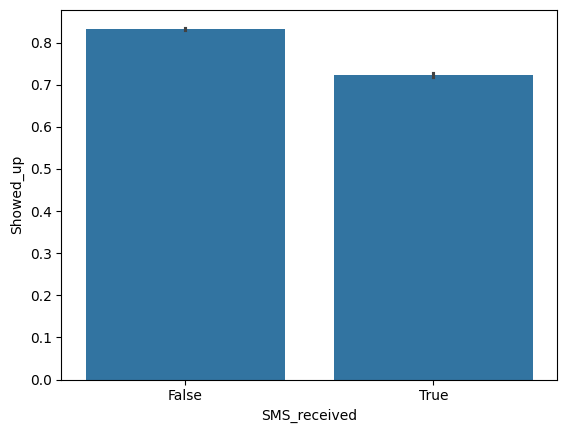

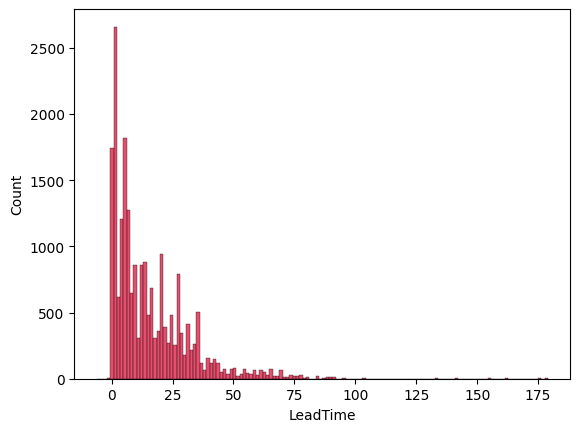

In [12]:
import seaborn as sns, matplotlib.pyplot as plt  
sns.barplot(data=df, x='SMS_received', y='Showed_up')  
plt.show()  
  
sns.histplot(df[df['Showed_up']==False]['LeadTime'], color='crimson')  
plt.show()  

In [13]:
X = df.drop(columns=['Showed_up'])  
y = df['Showed_up'].astype(int)   # 1 = attended, 0 = no-show  
  
X = pd.get_dummies(X, columns=['Gender','Neighbourhood','ApptWeekday'], drop_first=True)  

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(  
        X, y, test_size=0.2, stratify=y, random_state=42)  

In [16]:
X_train.dtypes

PatientId                       float64
AppointmentID                     int64
ScheduledDay             datetime64[ns]
AppointmentDay           datetime64[ns]
Age                               int64
                              ...      
ApptWeekday_Monday                 bool
ApptWeekday_Saturday               bool
ApptWeekday_Thursday               bool
ApptWeekday_Tuesday                bool
ApptWeekday_Wednesday              bool
Length: 101, dtype: object

In [17]:
X_train = X_train.astype(int)

In [18]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [21]:
df['Date_diff'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [22]:
df['ScheduledWeekday'] = df['ScheduledDay'].dt.weekday
df['AppointmentWeekday'] = df['AppointmentDay'].dt.weekday

In [23]:
df = df.drop(columns=['ScheduledDay', 'AppointmentDay'])

In [24]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [25]:
X = df.drop(columns=['Showed_up'])  # or your target column
y = df['Showed_up'].astype(int)



In [26]:
X = pd.get_dummies(X, drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [30]:
y_pred = tree.predict(X_test)
y_probs = tree.predict_proba(X_test)[:,1]

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': [200, 400], 'max_depth': [5, 8, 12]}

gs = GridSearchCV(RandomForestClassifier(random_state=42), param, cv=3, scoring='roc_auc')
gs.fit(X_train_res, y_train_res)

best_model = gs.best_estimator_


In [ ]:
importances = best_model.feature_importances_  
pd.Series(importances, index=X.columns).nlargest(15).plot(kind='barh')  
plt.show() 

In [ ]:
import joblib  
joblib.dump(best_model, 'no_show_model.joblib')  

In [1]:
!pip install powerbiclient 

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/434.1 MB ? eta -:--:--
     ---------------------------------------- 0.3/434.1 MB ? eta -:--:--
     ---------------------------------------- 1.6/434.1 MB 6.3 MB/s eta 0:01:09
     ---------------------------------------- 3.1/434.1 MB 6.4 MB/s eta 0:01:08
     ---------------------------------------- 4.5/434.1 MB 6.4 MB/s eta 0:01:08
      --------------------------------------- 5.8/434.1 MB 6.5 MB/s eta 0:01:06
      --------------------------------------- 7.3/434.1 MB 6.6 MB/s eta 0:01:05
      --------------------------------------- 8.4/434.1 MB 6.6 MB/s eta 0:01:05
      --------------------------------------- 9.4/434.1 MB 6.2 MB/s eta 0:01:09
      -------------------------------------- 10.0/434.1 MB 5.7 MB/s eta 0:01:15
      -------------------------------------- 10.0/434.1 MB 5.7 MB/s eta 0:01:15
     - ------------------------------------- 11.3/434.1 